## seasonal patterns FLC events in georges bank

In [1]:
import glob
import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nlct_path = "/mnt/data2/jturner/nlct_data/georges_bank/"

In [3]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 47

Creating seasonal average for month: 

In [4]:
month = '05' #mm
month_name = 'May'

In [5]:
files = sorted(glob.glob(nlct_path+'2023'+month+'*/*00H_00M'))

In [6]:
files

['/mnt/data2/jturner/nlct_data/georges_bank/20230501/goes_e_ntlc_2023_05_01_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230502/goes_e_ntlc_2023_05_02_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230503/goes_e_ntlc_2023_05_03_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230504/goes_e_ntlc_2023_05_04_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230505/goes_e_ntlc_2023_05_05_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230506/goes_e_ntlc_2023_05_06_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230507/goes_e_ntlc_2023_05_07_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230508/goes_e_ntlc_2023_05_08_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230509/goes_e_ntlc_2023_05_09_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230510/goes_e_ntlc_2023_05_10_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230511/goes_e_ntlc_2023_05_11_00H_00M',
 '/mnt/data2/jturner/nlct_data/georges_bank/20230512/g

Each NLCT file is a saved xarray DataArray, they need the dictionary to be appended into a Dataset:

In [7]:
datasets = []

for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        my_dict = {'BTD': data} 
        ds = xr.Dataset(my_dict)
        
        #--- Set negative values to zero
        ds['BTD'] = xr.where(ds['BTD'] < 0, 0, ds['BTD'])

        #--- Set positive values to 1
        #ds['BTD'] = xr.where(ds['BTD'] > 0, 1, ds['BTD'])
        
        datasets.append(ds)

nlst_ds = xr.concat(datasets, dim='time')

In [8]:
btd_mean = nlst_ds['BTD'].sum(dim='time')

In [9]:
overall_mean = btd_mean.mean(dim='y')
overall_mean = overall_mean.mean(dim='x')

In [10]:
high_lim = overall_mean.values
low_lim = overall_mean.values

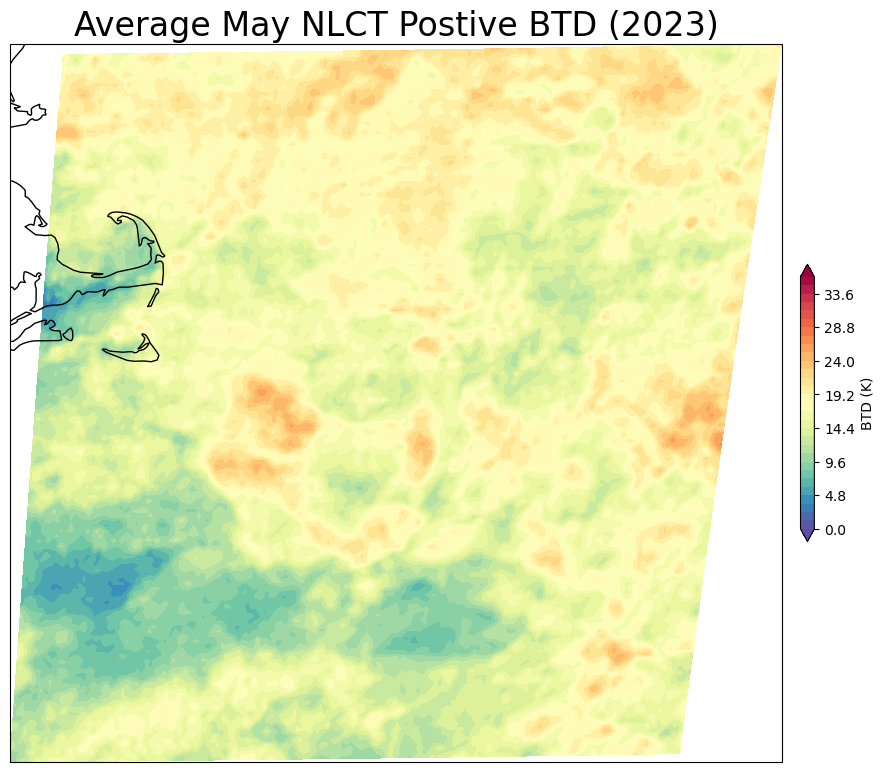

In [11]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(0, 36, 31)

c=ax.contourf(btd_mean.lon, btd_mean.lat, btd_mean, cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Average '+month_name+' NLCT Postive BTD (2023)', fontsize=24)
clb.set_label('BTD (K)')

ax.add_feature(cfeature.STATES)

plt.savefig('NLCT_Seasonal/'+month_name+'_nclt.png', bbox_inches='tight')